In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def f(x):
    return 1 + np.cos(x + 1 / 3) + x ** 2

In [156]:
a = -1
b = 2

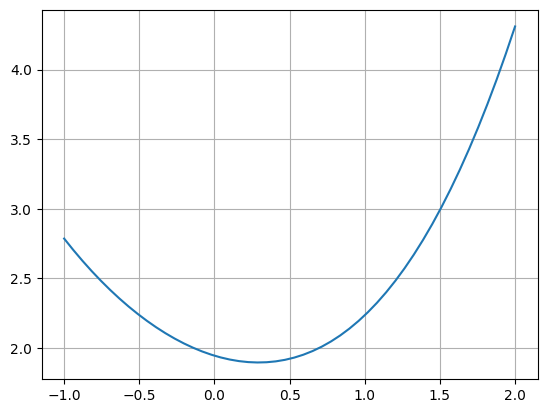

In [157]:
x = np.linspace(a, b)
plt.plot(x, f(x))
plt.grid(True)

# Метод Дихотомии

$
x_l = f(\frac{a + b}{2} - \frac{\epsilon}{2}) \newline
x_r = f(\frac{a + b}{2} + \frac{\epsilon}{2})
$

In [158]:
eps = 0.01

In [159]:
f((a + b) / 2 - eps / 2), f((a + b) / 2 + eps / 2)

(1.9211297077931648, 1.9237279701018681)

In [160]:
f_min = min(f(x))
f_min

1.8960641073538163

In [161]:
err = []

In [162]:
while abs(b - a) > 2 * eps:
    if f((a + b) / 2 - eps / 2) < f((a + b) / 2 + eps / 2):
        b = (a + b) / 2 + eps / 2
    else:
        a = (a + b) / 2 - eps / 2
    err.append(abs(f_min - f((a + b) / 2)))

In [163]:
a, b

(0.28476562499999997, 0.30060546874999994)

In [164]:
x_appr = (a + b) / 2
x_appr

0.2926855468749999

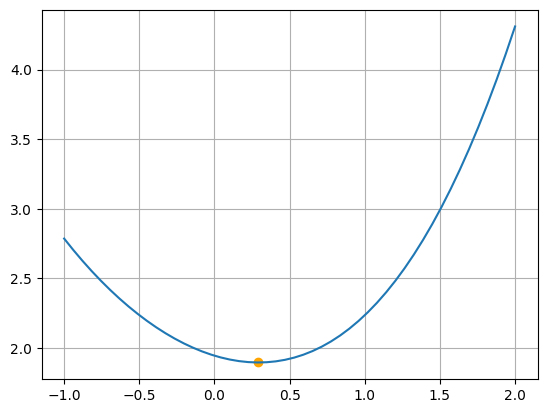

In [165]:
plt.plot(x, f(x))
plt.scatter(x_appr, f(x_appr), c='orange')
plt.grid(True)

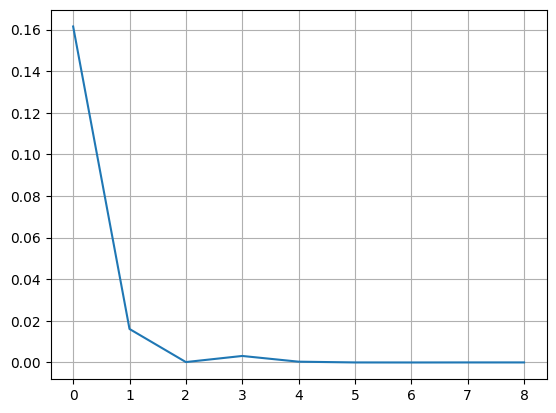

In [166]:
plt.plot(range(len(err)), err)
plt.grid(True)

#  Метод Ньютона

$
x_k = x_{k-1} - \frac{f'(x_k)}{f''(x_k)}
$

In [167]:
h = 0.001

In [168]:
k = 10
sol = [0] * k
sol[0] = 1

In [169]:
err_newton = []

In [170]:
for i in range(1, k):
    sol[i] = sol[i - 1] - (h / 2) * (f(sol[i - 1] + h) - f(sol[i - 1] - h)) / (f(sol[i - 1] + h) - 2 * f(sol[i - 1]) + f(sol[i - 1] - h))
    err_newton.append(abs(f_min - f(sol[i])))

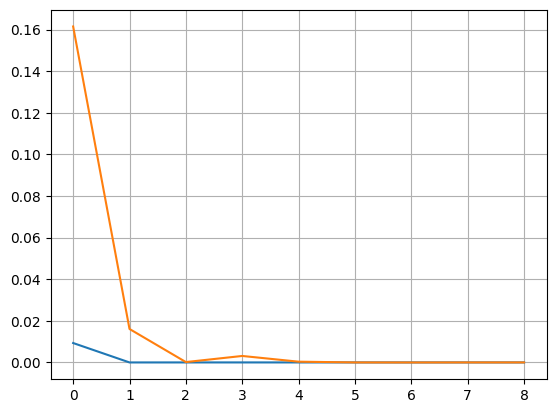

In [171]:
plt.plot(range(len(err_newton)), err_newton)
plt.plot(range(len(err)), err)
plt.grid(True)

# Градиентный спуск

In [172]:
def f(x, y):
    return 100 * (x - y ** 2) ** 2 + (1 - x) ** 2

In [173]:
y = np.linspace(a, b)

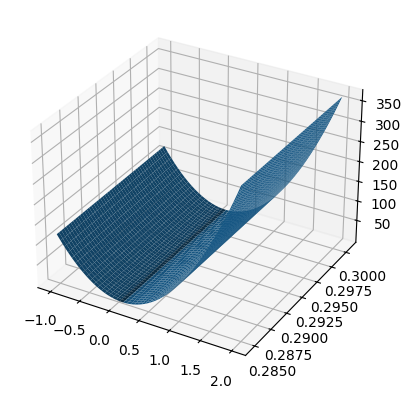

In [174]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, f(X, Y))

In [175]:
h = 0.001
sol = [-0.5, 0.5]
err = np.inf

In [176]:
def gradient(f, x, y):
    return np.array([(f(x + h, y) - f(x - h, y)) / (2 * h), (f(x, y + h) - f(x, y - h)) / (2 * h)])

In [177]:
while err > 0.001:
    sol = sol - h * gradient(f, sol[0], sol[1])
    err = np.linalg.norm(gradient(f, sol[0], sol[1])) 
    k += 1

In [178]:
sol

array([0.99934143, 0.9996696 ])

In [179]:
k

5135